### Can You Hear the Music?

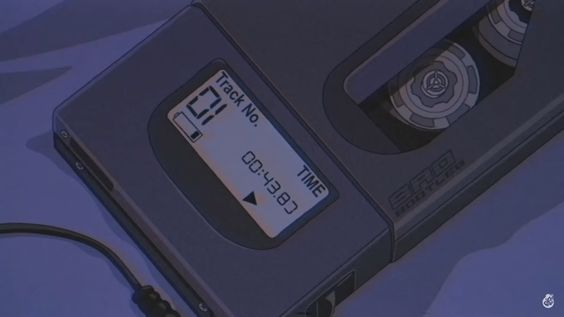

### Objetivo do projeto : 🎸

Criar um modelo de machine learning preditivo para classificar músicas lentas e agitadas, utilizando a base de dados "Spotify Tracks Dataset" do Kaggle. O link dessa base dados se encontra em : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

#Sobre a base de dados : 🎲

Conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes, de modo que cada faixa possui alguns recursos de áudio associados a ela.

### Uso da base: 🍥

O conjunto de dados pode ser usado para:
- Construir um sistema de recomendação com base em alguma entrada ou preferência do usuário
- Finalidade de classificação com base em recursos de áudio e gêneros disponíveis.

In [1]:
import pandas as pd

# "Setando" uma configuração que exibe todas as
# colunas do dataframe gerado.

pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Verificando se o dataframe possui dados nulos e/ou duplicados:**

In [2]:
# Verificando o tamanho dos dados:

df.shape

(114000, 21)

In [3]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
df.duplicated().sum()

0

Após verificar se havia a presença de dados NaN - nulos - ou duplicados, verificou-se que o dataframe apresentava apenas três colunas com uma linha de dados nulos. Como o tamanho do dataframe é elevado e a ausência de tais linhas não irão interferir no modelo, a abordagem adotada para tratar o conjunto de dados foi a de excluir os dados faltantes.

In [5]:
df = df.dropna()

df.shape

(113999, 21)

**Criando a variável target:**

> Segundo a regra de negócio, a coluna valence é uma medida de intervalo de 0.0 a 1.0, que descreve o aspecto emocional de cada faixa de música, de modo que as músicas com uma valência maior são tidas como positivas (por exemplo, feliz, alegre, eufórica), enquanto que as de menor valência são tidas como negativas (por exemplo, triste, irritada, deprimida). Desse modo, para a criação da variável target, irei utilizar a coluna "valence", para definir músicas agitadas, moderadas (o meio termo entre o eufórico e o melancólico) e lentas.

In [6]:
# Para analisar, primeiramente, a coluna valence irei plotar um histograma.
# Desse modo, para que eu consiga ter uma melhor análise e visualização,
# irei calcular qual deve ser a largura dos histogramas, por meio da função
# abaixo.

import numpy as np

def calcular_largura_bin(df, coluna):

  # Calculando os quartis de 75% e 25% da coluna especificada:
  Q75, Q25 = np.percentile(df[coluna], [75 ,25])

  # Calculando a diferença interquartil, sendo uma medida da
  # dispersão dos dados.
  IQR = Q75 - Q25

  # Aqui, a largura do bin (usada em histogramas) está sendo calculada.
  # A fórmula utilizada inclui o dobro do IQR multiplicado pelo tamanho do
  # DataFrame elevado a -1/3 (o cubo da raiz cúbica do tamanho do DataFrame).
  # Este é um método comum para estimar a largura ideal do bin em um histograma.
  largura_bin = 2 * IQR * np.power(len(df[coluna]), - 1/3)

  return largura_bin

In [7]:
# largura do bin para a coluna valence:

largura_bin_vl = calcular_largura_bin(df, "valence")
largura_bin_vl

0.017447639625240725

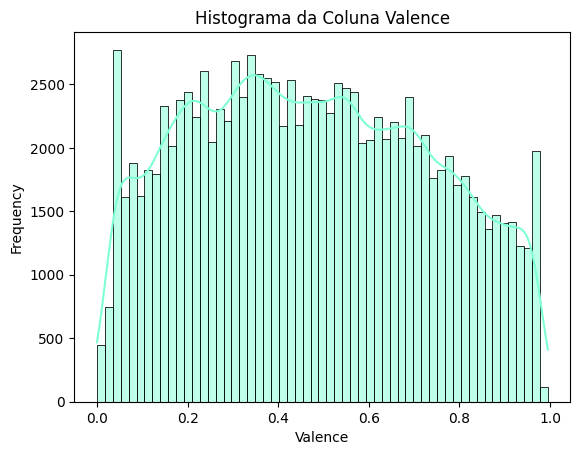

In [8]:
# Analisando a coluna valence para entendê-la e criar a variável target:

import matplotlib.pyplot as plt
import seaborn as sns

# Usando Seaborn para criar o histograma
sns.histplot(df["valence"], color="aquamarine", edgecolor="black",
             kde = True,
             binwidth = largura_bin_vl)

plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.title("Histograma da Coluna Valence")

# Exibir o gráfico
plt.show()

In [9]:
# Verificando os dados estatísticos da coluna valence:

df.valence.describe()

count    113999.000000
mean          0.474066
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

Analisando tanto as descrições estatísticas quanto o gráfico, concebe-se que uma significativa parte das faixas de músicas mais frequentes são aquelas que apresentam menor frequência, o que pode indicar que a maioria das músicas presentes no conjunto de dados passado são lentas.

De outro modo, pode-se observar que o gráfico enquanto tal não forma uma função normal, porém não é tão assimétrico, o que pode indicar que não aja a presença elevada de outliers, cabendo, contudo uma verificação, tanto numericamente quanto visualmente.

In [10]:
# Calcule os limites para outliers usando o método IQR (Intervalo Interquartil)
Q1 = df['valence'].quantile(0.25)
Q3 = df['valence'].quantile(0.75)
IQR = Q3 - Q1

# Limite inferior:
lower_limit = Q1 - 1.5 * IQR

# Limite superior:
upper_limit = Q3 + 1.5 * IQR

# Identifique e conte outliers
outliers = df[(df['valence'] < lower_limit) | (df['valence'] > upper_limit)]
print(f"Número de outliers:, {len(outliers)}")

Número de outliers:, 0


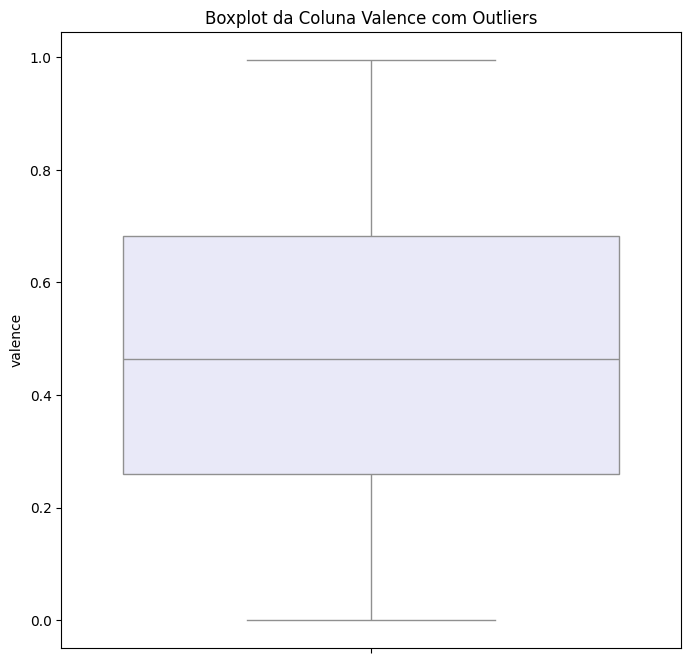

In [11]:
# Visualize graficamente os outliers
plt.figure(figsize=(8, 8))
sns.boxplot(y=df['valence'], color = "lavender")
plt.title('Boxplot da Coluna Valence com Outliers')
plt.show()

Depois da análise numérica e gráfica, parece que não há outliers.

In [12]:
# Verificando a mediana, pois ela coincide com o segundo quartil:

df.valence.median()

0.464

Depois de realizar a análise gráfica dos dados, vou categorizar a valência das músicas, segmentando em lenta, moderada e agitada:

In [13]:
def categorizar_valence(row):

  if row["valence"] > 0.5:
    return "agitada"

  else:
    return "lenta"

# Criando uma nova coluna "target" com base na função criada:

df["target"] = df.apply(categorizar_valence, axis = 1)
df.head()



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


In [44]:
# Verificando a proporção de músicas consideradas lentas, moderadas e agitadas:

print("Músicas lentas: ")
print(round(len(df[df["target"]  == "lenta"]) / len(df), 2))
print("")
print("Músicas agitadas: ")
print(round(len(df[df["target"]  == "agitada"]) / len(df), 2))

Músicas lentas: 
0.54

Músicas agitadas: 
0.46


In [47]:
# Visualizando graficamente a proporção das músicas em relação ao dataframe:

import plotly.express as px

# Calcular as proporções
proporcao_lenta = len(df[df["target"] == "lenta"]) / len(df)
proporcao_moderada = len(df[df["target"] == "moderada"]) / len(df)
proporcao_agitada = len(df[df["target"] == "agitada"]) / len(df)

# Criar um DataFrame com as proporções
dados_proporcoes = {'Classe': ['Lenta', 'Agitada'],
                    'Proporcao': [proporcao_lenta,
                                  proporcao_agitada]}

df_proporcoes = pd.DataFrame(dados_proporcoes)

# Criar o gráfico de pizza com Plotly Express
fig = px.pie(df_proporcoes, names='Classe', values='Proporcao',
             title='Proporção de Classes de Música')

fig.show()

### Feature Engineering : ⚒️



A etapa de feature engineering se consiste em verificar quais são as variáveis explicativas que conseguem responder a variável resposta, que é a target, de modo que apresentam uma maior correlação a ela. Essa etapa é muito importante, pois garante a otimização da análise e do modelo.

In [16]:
# Verificando o nome das colunas:

df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [17]:
# Verificando a quantidade de dados únicos da coluna:

# Essa estratégia pode ser eficiente para nos atermos
# rapidamente àquelas que apresentam 2 itens únicos,
# que pode indicar dados booleanos, que precisam ser
# passados em sua forma numérica para a criação do
# modelo de machine learning.

df.nunique()

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
target                   2
dtype: int64

In [18]:
df["explicit"].unique()

array([False,  True])

In [19]:
df["mode"].unique()

array([0, 1])

In [20]:
df['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [21]:
df['track_id'].head()

0    5SuOikwiRyPMVoIQDJUgSV
1    4qPNDBW1i3p13qLCt0Ki3A
2    1iJBSr7s7jYXzM8EGcbK5b
3    6lfxq3CG4xtTiEg7opyCyx
4    5vjLSffimiIP26QG5WcN2K
Name: track_id, dtype: object

Até o momento, as colunas que parecem ser desnecessárias à criação do modelo são as duas últimas impressas, que podem ser preteridas para a elaboração de um novo dataframe que sirva ao modelo. Além disso, observa-se que a coluna "explicit" precisa ser alterada para valores numéricos.

In [22]:
df["explicit"] = df.explicit.astype(int)

df['explicit'].unique()

array([0, 1])

In [23]:
# Excluindo as colunas desnecessárias:

df = df.drop(["Unnamed: 0", "track_id"], axis = 1)

df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


**Tratando os dados categóricos:**

> Para levar os dados ao modelo para que esse consiga de fato treinar, testar e prever qual é o tipo de faixa de música, antes deve-se transformar os dados categóricos em numéricos, codificando-os. Existem algumas formas de se fazer isso, como o get_dummies, porém, para esse cenário, irei utilizar o LabelEncoder.

In [24]:
def dataframe_encoded(df, columns_to_encode):

    """
    Codifica as colunas especificadas em um DataFrame usando o LabelEncoder.

    Parâmetros:
    - df: DataFrame a ser modificado.
    - columns_to_encode: Lista de colunas a serem codificadas.

    Retorna:
    - DataFrame modificado.
    """

    # Importa o LabelEncoder da biblioteca scikit-learn
    from sklearn.preprocessing import LabelEncoder

    # Cria uma instância do LabelEncoder
    le = LabelEncoder()

    # Loop sobre as colunas a serem codificadas
    for column in columns_to_encode:
        # Verifica se a coluna está presente no DataFrame
        if column in df.columns:
            # Codifica a coluna usando o LabelEncoder
            df[column] = le.fit_transform(df[column])
        else:
            # Exibe uma mensagem de aviso se a coluna não estiver presente no DataFrame
            print(f"A lista possui itens que não estão disponíveis no dataframe: {column} ")

    # Retorna o DataFrame modificado
    return df


In [25]:
# Para facilitar a visualização das colunas que eu tenho que modificar,
# que são aquelas cujo Dtype é object denota que são strings:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             11

In [26]:
df_musica = df.copy()

In [27]:
colunas_a_codificar = ["artists", "album_name", "track_name", "track_genre", "target"]

dataframe_encoded(df_musica, colunas_a_codificar)

df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


**Analisando as features que irão compor o modelo: 📊**

Para analisar quais features podem fazer parte do modelo e as que não precisam, pois apresentam pouca ou nula contribuição, pode-se utilizar de algumas abordagens, dentre as quais criar um gráfico de matriz de correlação e aferir a importância das variáveis por meio de um modelo de RandomForest. Irei utilizar os dois.

<Axes: >

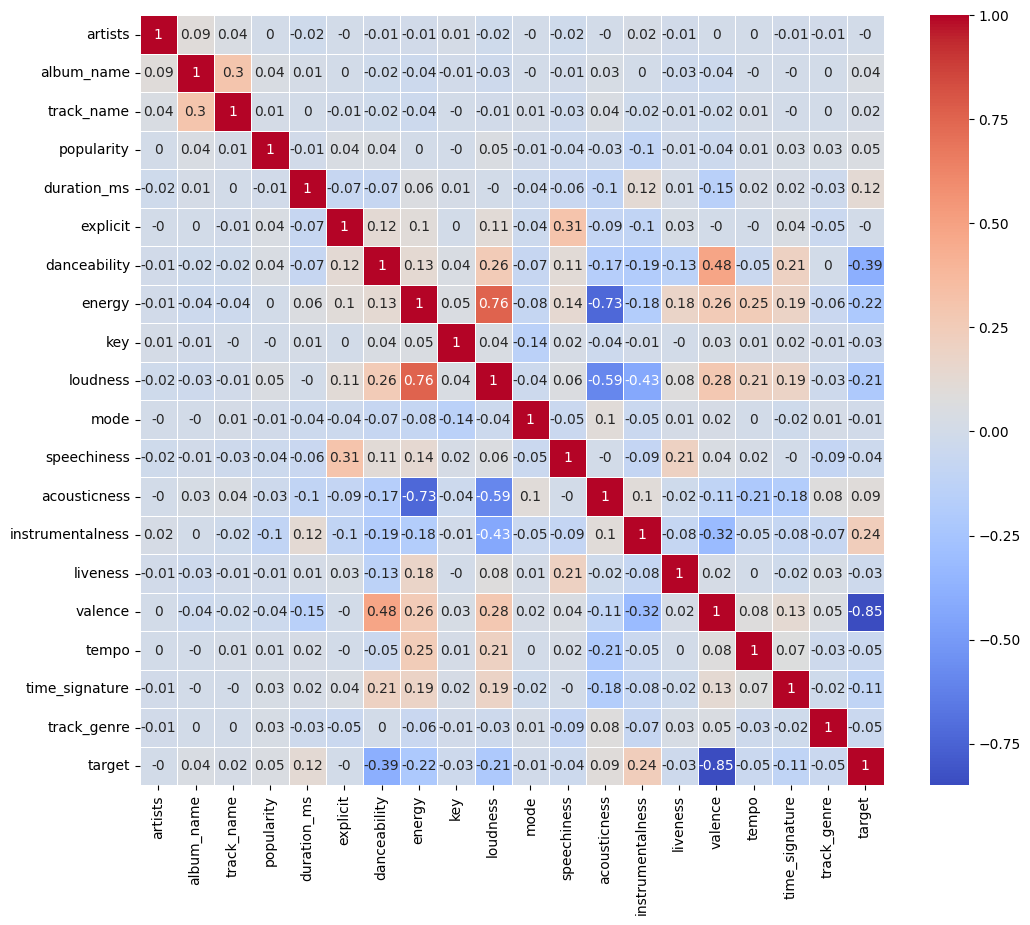

In [28]:
# Analisando as variáveis por meio de uma matriz de correlação :

correlation_matrix = df_musica.corr().round(2)

fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(data = correlation_matrix, annot = True, linewidths = 0.5, ax = ax, cmap = "coolwarm")

In [29]:
# Analisando a importância das features por meio de um modelo de regressão:

import statsmodels.api as sm

# Variáveis explicativas:
X = df_musica[['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit',
                'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'track_genre']]

# Variável resposta:
y = df_musica['target']

# Adiciona uma constante à matriz de features (intercepto)
X = sm.add_constant(X)

# Cria o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Imprime um resumo estatístico do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:02:08   Log-Likelihood:                -7892.4
No. Observations:              113999   AIC:                         1.582e+04
Df Residuals:                  113979   BIC:                         1.602e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3352      0.011  

A partir do sumário, verificando o valor-p, que se refere à significância estatística das variáveis, concebe-se que as variáveis que apresentam pouca significância é album_name, track_name, mode e time_signature, o que significa dizer não precisam ser passadas ao modelo.

In [30]:
# Excluindo as colunas que apresentam pouca significância estatística:
df_musica = df_musica.drop(["album_name", "track_name", "mode", "time_signature"], axis = True)

In [31]:
df_musica.head()

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,target
0,10357,73,230666,0,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,0
1,3287,55,149610,0,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0,1
2,12397,57,210826,0,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,1
3,14839,71,201933,0,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,1
4,5255,82,198853,0,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,1


**Equilíbrio da Target:**

É importante entender o equilíbrio da variável target em relação ao dataframe, de modo que, caso haja uma maior proporção de um resultado em relação ao outro isso pode enquadrar na formação de viés ao modelo, implicando negativamente à análise.

In [32]:
df_musica["target"].value_counts(normalize=True)*100

1    54.373284
0    45.626716
Name: target, dtype: float64

In [33]:
# Segmentando os dados:
X = df_musica.drop("target", axis = 1)
y = df_musica["target"]

In [34]:
from sklearn.model_selection import train_test_split

# Para criar o modelo, preciso dividir os dados em treino e teste:
# Segmentando em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)



Normalizando os dados: 📏

**Normalização dos dados:**

A normalização refere-se ao processo de ajustar os valores das variáveis para que eles estejam em uma escala similar, de modo que garantem a melhora da análise por parte do modelo, bem como evita, pode evitar, a formação de viéses.

A estratégia de normalização adotada será a de MinMaxScaler, na forma que transforma os valores dos dados num intervalo entre 0 e 1, no qual o valor mínimo é o 0 e máximo o 1. Essa técnica é especialmente útil quando os algorítimos de machine learning são sensíveis à escala dos dados.

**Obs:**

Antes da normalização é importante separar os dados de treino e teste, de modo que garanta que os dados de teste não sejam introduzidos nos de treino.

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Instanciando o MinMaxScaler:
scaler = MinMaxScaler()

# Para a normalização, apenas a porção de treino é treinada,
# buscando garantir que não haja o vazamento de dados de teste
# para treino.
scaler.fit(X_train)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

In [36]:
X_train_escalonado.shape

(91199, 15)

In [37]:
y_train.shape

(91199,)

Criando uma função que execute o modelo preditivo e realiza uma avaliação de seus resultados com base nas principais métricas de validação usadas.

In [38]:
X_test_escalonado.shape

(22800, 15)

In [39]:
y_test.shape

(22800,)

In [52]:
def roda_modelos(modelos):

  from sklearn.metrics import roc_curve, roc_auc_score, classification_report

  # Treinando o modelos:
  modelos.fit(X_train_escalonado, y_train)

  # Calculando a probabilidade da área da curva AUC:

  # Obter as probabilidades associadas:
  prob_predict = modelos.predict_proba(X_test_escalonado)

  # Curva AUC:
  auc = roc_auc_score(y_test, prob_predict[:,1])

  print(f"AUC {auc}")

  # Fazendo a predição dos dados de teste e calculando o classification report:
  predicao = modelos.predict(X_test_escalonado)
  print("\nClassification Report")
  print(classification_report(y_test, predicao))

  print("\nRoc Curve\n")
  # Fazer previsoes de probabilidades
  y_pred_probs = modelos.predict_proba(X_test_escalonado)[:, 1]

  # Calcular a curva ROC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

  # Calcular a AUC (área sob a curva ROC)
  auc = roc_auc_score(y_test, y_pred_probs)

  # Plotar a curva ROC:
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color = "blue", label = f"ROC curve  (AUC = {auc:.2f})")
  plt.plot([0, 1], [0, 1], color = "grey", linestyle = "--")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeiro Positivo")
  plt.title("Curva ROC")
  plt.legend(loc = "lower right")
  plt.show()

  y_pred = (y_pred_probs > 0.5).astype(int)



### Modelos:

**Modelo de Regressão Logística:**

Construido por meio de uma função logística, define os dados entre um intervalo de 0 e 1.

AUC 0.9999922499066579

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10436
           1       1.00      1.00      1.00     12364

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800


Roc Curve



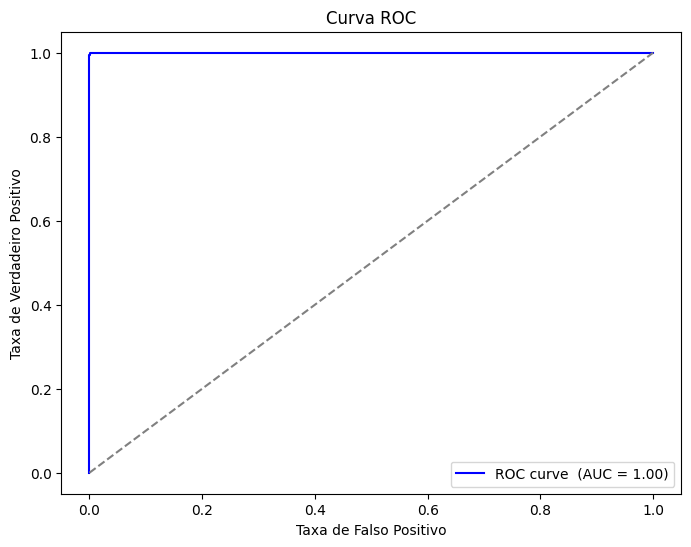

CPU times: user 769 ms, sys: 400 ms, total: 1.17 s
Wall time: 976 ms


In [53]:
%%time

from sklearn.linear_model import LogisticRegression

# Instanciando o modelo de regressão logística:
logistic_regression_model = LogisticRegression()

# Aplicando
roda_modelos(logistic_regression_model)

**Entendendo a curva ROC**

> A linha azul se refere à curva ROC, de modo que quanto mais ela estiver próxima de 1, no eixo y, e distante, portanto, da linha tracejada indica que o modelo está sendo eficiente.

**Entendendo as métricas precision, recall e f1-score:**

> - precision: A capacidade do modelo de não rotular como negativo dados positivos, de modo que quanto mais ele rotula como positivo dados que sejam verdadeiramente positivos a sua precisão é maior.

> - recall: Capacidade de prever dados positivos corretamente em relação a todo universo de verdadeiros positivos.

> - f1-score: A média harmônica das duas métricas anteriores.  

**KNN (K-Nearest Neighbors):**

Identifica os Kpontos mais próximos (vizinhos) no conjunto de treinamento. Esse modelo se trata de um aprendizado supervisionado, baseado nas classes dos pontos dos vizinhos mais próximos. Com base na distância deles em relação às classes especificadas, que pode ser calculada de modo euclidiano, o modelo determina a que classe determinados pertencem a partir de um determinado escopo de vizinhos, que pode ser passado como um hiperparâmetro, que no caso é 3.

AUC 0.983285842569688

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10436
           1       0.95      0.96      0.96     12364

    accuracy                           0.95     22800
   macro avg       0.95      0.95      0.95     22800
weighted avg       0.95      0.95      0.95     22800


Roc Curve



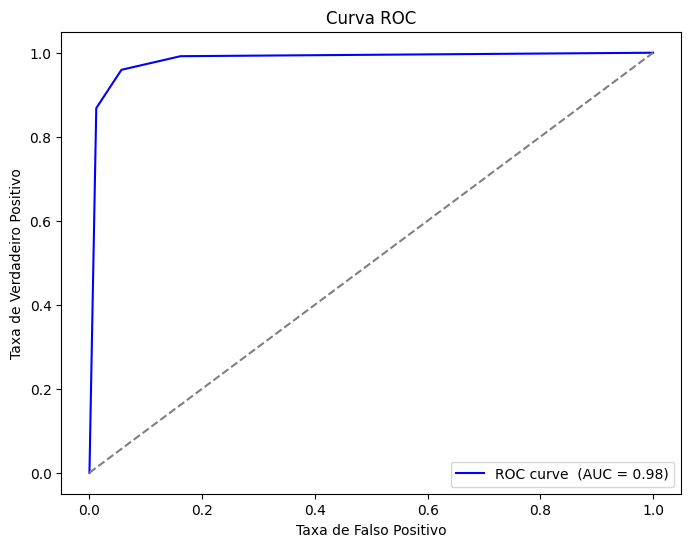

CPU times: user 22.8 s, sys: 139 ms, total: 23 s
Wall time: 22.9 s


In [54]:
%%time

from sklearn.neighbors import KNeighborsClassifier

# Instanciando o modelo:
knn_model = KNeighborsClassifier(n_neighbors=3)

# Aplicando-o na função criada:
roda_modelos(knn_model)

**Random Florest:**

O Random Florest Classifier é um algoritimo de *ensemble learning* que combina vários modelos para melhorar a performance, criando uma floresta de árvores de decisão, na qual cada árvore é treinada em um subconjunto aleatório de dados (bootstrap), de modo que a classe final do novo ponto é considerada a classe mais votada pelas árvores da floresta.

Ensemble Learning, vale dizer, é uma abordagem adotada no contexto de machine learning na qual há a combinação de inúmeros modelos para resolver uma mesma questão, combinando em seguida as suas predições com a finalidade de obter um resultado mais preciso e robusto do que apenas modelos individuais poderiam fazer. A ideia fundamental dessa prática é que por meio da combinação dos modelos esses consigam superar as fraquezas de cada qual e aprimorar as respectivas forças, resultando em um desempenho mais geral e estável.

AUC 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10436
           1       1.00      1.00      1.00     12364

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800


Roc Curve



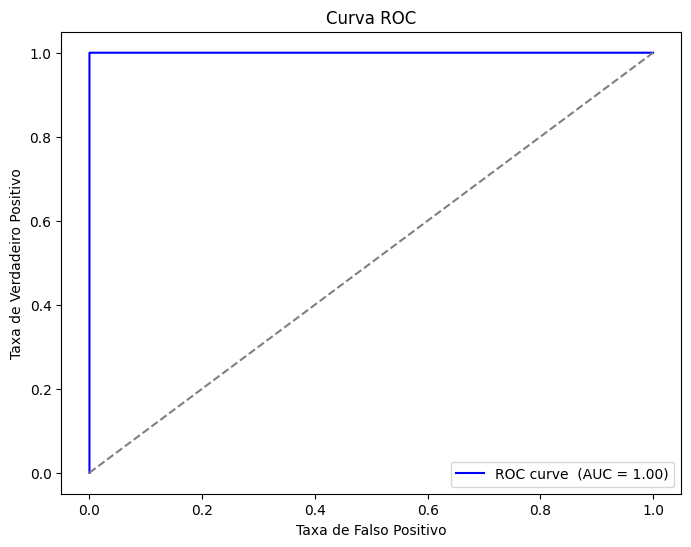

CPU times: user 6.93 s, sys: 94.4 ms, total: 7.03 s
Wall time: 6.97 s


In [55]:
%%time

from sklearn.ensemble import RandomForestClassifier

# Instanciando o modelo:

# Os hiperparâmetros passados se referem a profundidade máxima
# que as árvores geradas podem ter, bem como a quantidade máxima
# de árvores presentes na floresta gerada.

# É importante se atentar aos hiperparâmetros, como no caso do max_depth,
# pois uma profundidade demasiada pode incorrer em casos de overfitting,
# cenário no qual o modelo fica sobretreinado, dificultando a sua generalização.

# O número dos estimadores, como dito, simboliza a quantidade de árvores,
# de modo que quanto mais árvores houver, melhor será o modelo, porém isso
# acarreta em maior custo computacional.
rf_model = RandomForestClassifier(max_depth = 7, n_estimators = 100)

# Aplicando o modelo:
roda_modelos(rf_model)

**Testando novos parâmetros para o RandomFlorest com o Grid Search:**

In [58]:
%%time

from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros a serem testados
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciando o Grid Search
grid_search = GridSearchCV(rf_model, params_grid, cv=5, scoring="f1", n_jobs=-1)

# Treinando o Grid Search no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Extraindo os melhores hiperparâmetros
best_params = grid_search.best_params_

print(f"Os melhores hiperparâmetros foram {best_params}")


Os melhores hiperparâmetros foram {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: user 24.2 s, sys: 5.06 s, total: 29.2 s
Wall time: 52min 7s


AUC 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10436
           1       1.00      1.00      1.00     12364

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800


Roc Curve



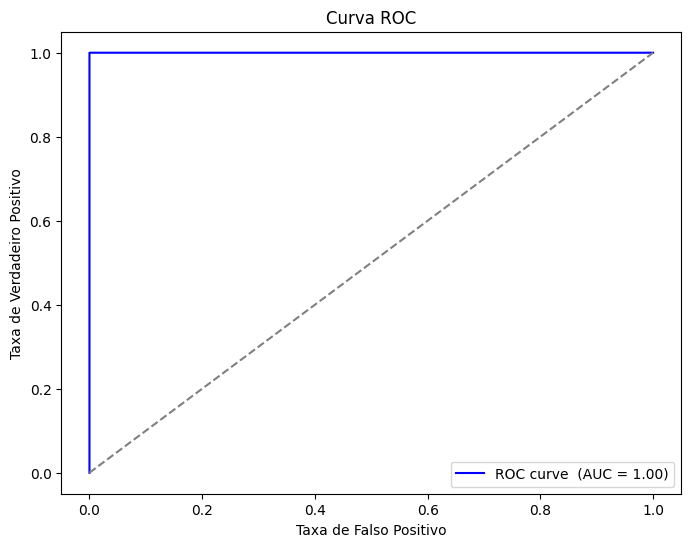

In [60]:
# Modelo otimizado com os melhores hiperparâmetros, segundo o GridSearch:

rf_model_gs = RandomForestClassifier(max_depth = 5, min_samples_leaf = 1,
                                     min_samples_split = 2 ,n_estimators = 100)

roda_modelos(rf_model_gs)